# Test di acquisizione a differenti flussi (17-10-2017)
In data 17-10-2017 sono stati acquisiti spettri NIR in trasmittanza per flussi con portate pari a 0, 33 e 96 mL/min (le unità di misura sono giuste?) per 3 min di acquisizione.

L'ordine delle acquisizione è stato il seguente:
1. 33 mL/min (36 spettri)
2. 96 mL/min (36 spettri)
3. 0 mL/min (37 spettri)

In [1]:
NIR <- read.csv("NIR_spectra_all.csv", header = T)

# Plot degli spettri medi

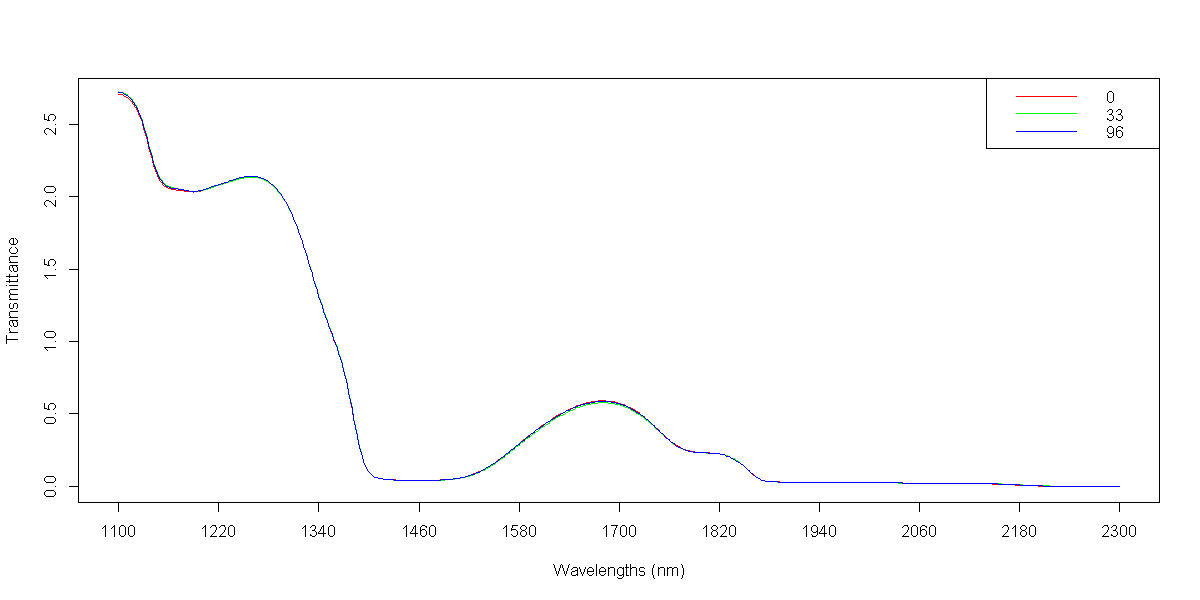

In [2]:
options(repr.plot.width=12, repr.plot.height=6, repr.plot.res = 100)
NIR.ave <- aggregate(NIR[,3:603], by = list(NIR$Sample), mean)
cols <- rainbow(3)
x <- seq(1100, 2300, by = 2)
plot(x, NIR.ave[1,-1], type = 'l', col = cols[1], axes = F,
     xlab = 'Wavelengths (nm)', ylab = 'Transmittance')
lines(x, NIR.ave[2,-1], col = cols[2])
lines(x, NIR.ave[3,-1], col = cols[3])
axis(1, seq(1100, 2300, length.out =  11))
axis(2,)
box()
legend('topright', c('0', '33', '96'), lty = 1, col = cols)

Osservazioni:
1. Ad occhio non sembrano presenti differenze tra gli spettri medi (quasi perfettamente sovrapponibili)
2. La regione spettrale prossima ed oltre i 1940 nm non sembra molto informativa

# Confronto tra gli spettri acquisiti ai diversi flussi (tramite PCA)

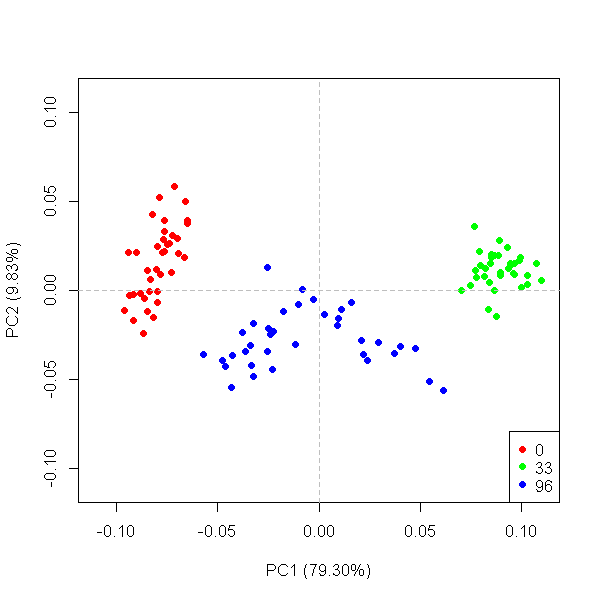

In [3]:
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res = 100)
pca <- prcomp(NIR[,-c(1:2)], center = T)

labels <- as.numeric(as.factor(NIR$Sample))

scores <- pca$x
loadings <- pca$rotation

plot(scores[,1], scores[,2], col = cols[labels], pch = 16, ylim = c(-0.11, 0.11), xlim = c(-0.11, 0.11),
     xlab = 'PC1 (79.30%)', ylab = 'PC2 (9.83%)')
abline(v = 0, lty = 2, col = 'grey')
abline(h = 0, lty = 2, col = 'grey')
legend('bottomright', c('0', '33', '96'), pch = 16, col = cols)

Osservazioni:
1. La PCA mette in evidenza che gran parte della varianza è spiegata dalle prime due PCs (89.13%)
2. Sembrano esservi delle differenze ai diversi flussi
3. I punti acquisiti durante il flusso a 96 mL/min (blu) presentano una disposizioni a ferro di cavallo (horseshoe effect)

# Analisi dei Loadings delle prime due PCs
L'approccio seguente consente di capire quali lunghezze d'onda sono responsabili della disposizione dei campini nello spazio 2D definito dalle PCs

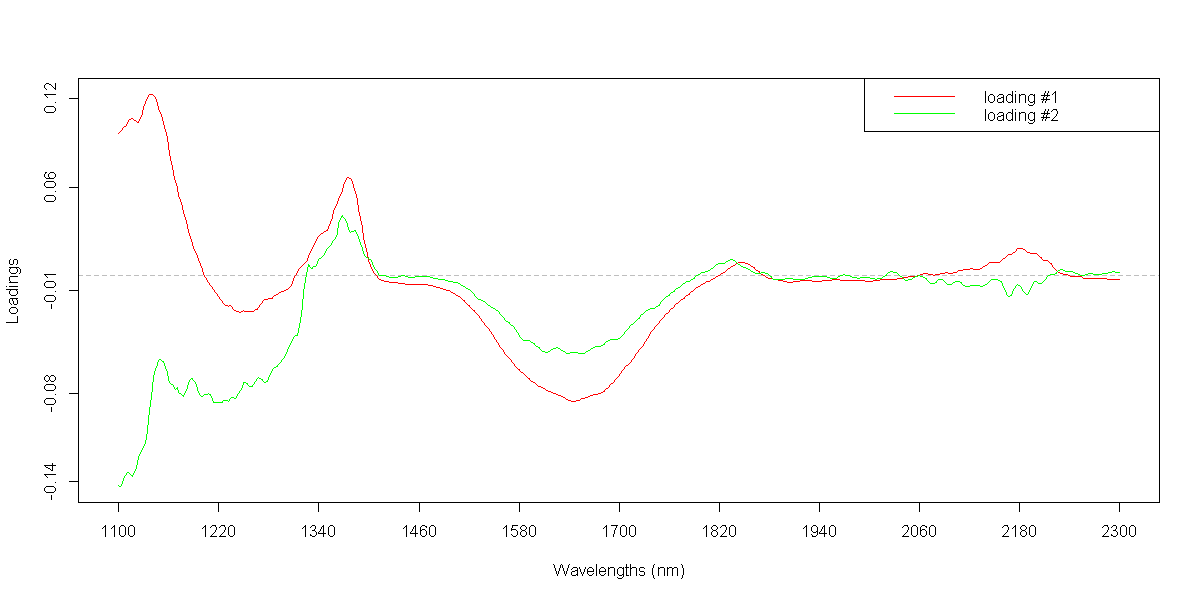

In [4]:
options(repr.plot.width=12, repr.plot.height=6, repr.plot.res = 100)
yrange <- c(min(loadings[,c(1:2)]), max(loadings[,c(1:2)]))
plot(x, loadings[,1], ylim = yrange, type = 'n',
     xlab = 'Wavelengths (nm)', ylab = 'Loadings',  axes = F)
abline(h = 0, lty = 2, col = 'grey')
lines(x, loadings[,1], col = 'red')
lines(x, loadings[,2], col = 'green')
axis(1, seq(1100, 2300, length.out =  11))
axis(2, round(seq(yrange[1], yrange[2], length.out = 5),2))
legend('topright', c('loading #1', 'loading #2'), lty = 1, col = c('red', 'green'))
box()

Osservazioni:
1. I minimi ed i massimi locali descrivono la relazione esistente tra lunghezza d'onda e scores delle PCs
2. Minimi e massimi locali tra il 1° ed il 2° loading sono molto somiglianti, pertanto, la idenficiazione dei min/max locali è stata effettuata solo sul 1° loading

# Identificazione dei minimi/massimi locali del 1° loading
La identificazione dei min/max locali è stata effettuata mediante derivata 1a (D1f) e 2a (D2f) del 1° loading.

Loading required package: prospectr
Loading required package: RcppArmadillo


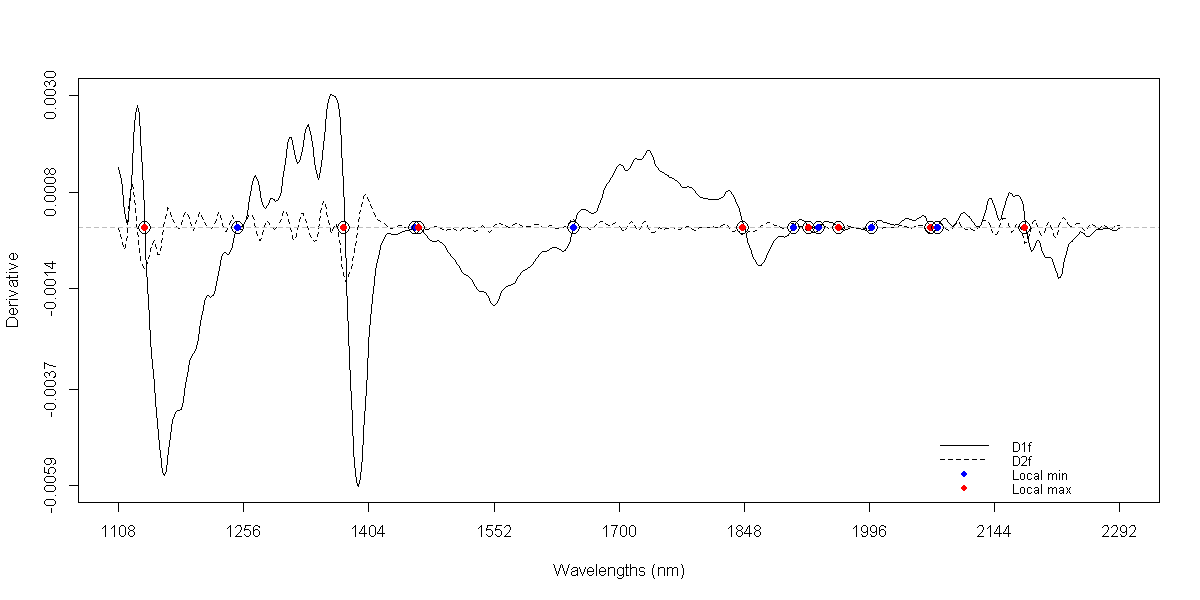

In [5]:
require(prospectr)
dev1 <- savitzkyGolay(loadings[,1], p = 2, w = 9, m = 1)
dev2 <- savitzkyGolay(loadings[,1], p = 2, w = 9, m = 2)
plot(x[5:597], dev1, type = 'l', axes = F, xlab = 'Wavelengths (nm)', ylab = 'Derivative')
lines(x[5:597], dev2, type = 'l', lty = 2)
abline(h = 0, lty = 2, col = 'grey')
axis(1, seq(1108, 2292, length.out = 9))
axis(2, round(seq(min(dev1), max(dev1), length.out = 5),4))
box()

check.dev1 <- 0
for (i in 1:(length(dev1))){
  check.dev1[i] <- dev1[i]*dev1[i+1]
}

points.dev1 <- which(check.dev1 < 0)
for (i in 1:length(points.dev1)){
  points(x[5:597][points.dev1][i], 0, pch = 1, cex = 1.8)
  if (dev2[points.dev1][i] < 0) {
    points(x[5:597][points.dev1][i], 0, pch = 16, col = 'red')
  }
  else {
    points(x[5:597][points.dev1][i], 0, pch = 16, col = 'blue')
  }
}

legend('bottomright', c('D1f','D2f','Local min','Local max'),
       lty = c(1,2,NA,NA), pch = c(NA,NA,16,16), col = c(1,1,4,2), cex = 0.8, bty = 'n')

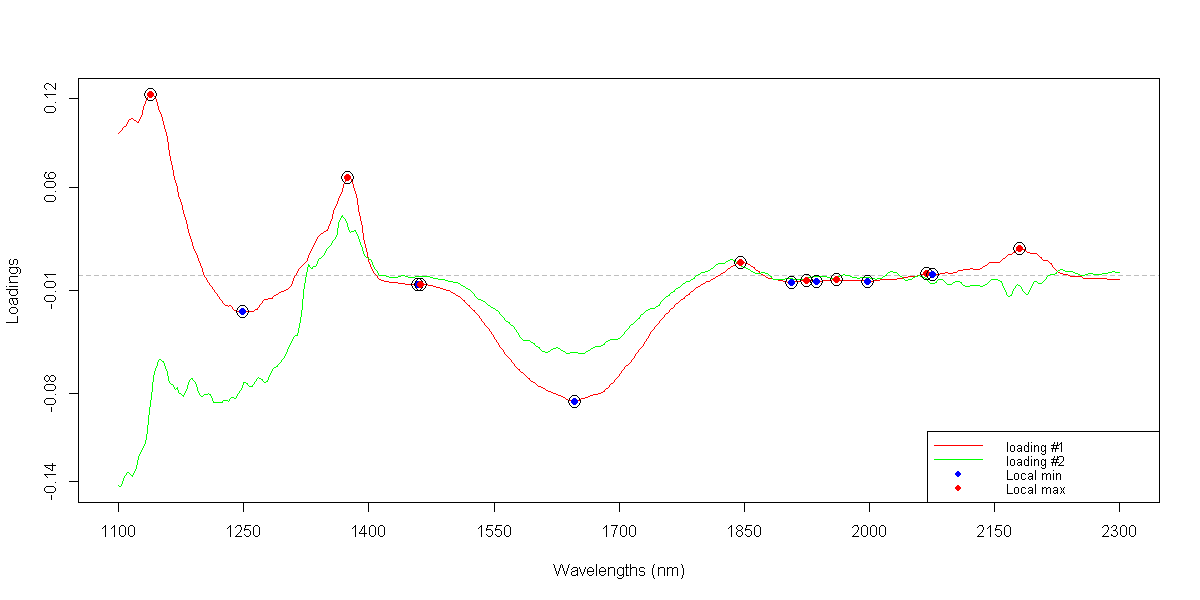

In [6]:
x <- seq(1100, 2300, by = 2)
yrange <- c(min(loadings[,c(1:2)]), max(loadings[,c(1:2)]))
plot(x, loadings[,1], ylim = yrange, type = 'n',
     xlab = 'Wavelengths (nm)', ylab = 'Loadings',  axes = F)
abline(h = 0, lty = 2, col = 'grey')
lines(x, loadings[,1], col = 'red')
lines(x, loadings[,2], col = 'green')
axis(1, seq(1100, 2300, length.out =  9))
axis(2, round(seq(yrange[1], yrange[2], length.out = 5),2))
box()

for (i in 1:length(points.dev1)){
  points(x[points.dev1][i]+8, loadings[points.dev1[i]+4,1], pch = 1, cex = 1.8)
  if (dev2[points.dev1][i] < 0) {
    points(x[points.dev1][i]+8, loadings[points.dev1[i]+4,1], pch = 16, col = 'red')
  }
  else {
    points(x[points.dev1][i]+8, loadings[points.dev1[i]+4,1], pch = 16, col = 'blue')
  }
}

legend('bottomright', c('loading #1', 'loading #2', 'Local min', 'Local max'), cex = 0.8,
       lty = c(1,1,NA,NA), col = c('red', 'green', 'blue', 'red'), pch = c(NA,NA,16,16))

# Biplot degli scores e dei loadings
Nel seguente grafico sono riportati tutti gli scores dei campioni e le lunghezze d'onda selezionate mediante D1f e D2f del 1° loading.

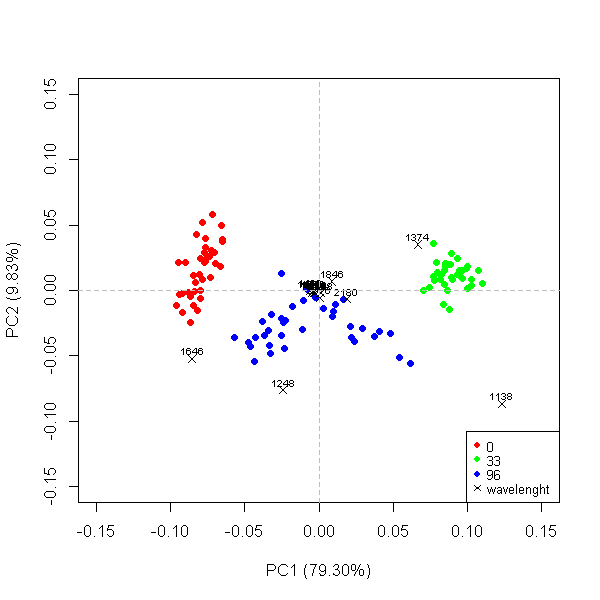

In [7]:
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res = 100)
plot(scores[,1], scores[,2], col = cols[labels], pch = 16, ylim = c(-0.15, 0.15), xlim = c(-0.15, 0.15),
     xlab = 'PC1 (79.30%)', ylab = 'PC2 (9.83%)')
points(loadings[points.dev1+4,1], loadings[points.dev1+4,2], pch = 4)
text(loadings[points.dev1+4,1], loadings[points.dev1+4,2]+0.006, x[points.dev1+4], pch = 4, cex = 0.6)
abline(v = 0, lty = 2, col = 'grey')
abline(h = 0, lty = 2, col = 'grey')
legend('bottomright', c('0', '33', '96', 'wavelenght'), pch = c(16,16,16,4), col = c(cols, 1), cex = 0.8)

Osservazioni:
1. Le lunghezze d'onda circa pari a 1138, 1248, 1374, 1646 ed, in mimina parte, 1846 e 2180 nm sono le principali responsabili del pattern osservato
2. Le altre lunghezze d'onda selezionate (disposte all'incrocio degli assi cartesiani) sembrano avere un effetto trascurabile

# Test di rimozione dell'effetto di scattering
Di seguito è ripetuta l'analisi precedente, andando però a rimuovere un possibile effetto scattering presente negli spettri dei campioni. L'intento è quello di capire se le variazioni di flusso sono responsabili delle differenze osservate.

# Analisi PCA
La PCA è stata rieffettuata sul nuovo dataset, in cui appunto l'effetto scattering è stato rimosso tramite l'algoritmo SNV (Standard Normal Variate).

In [8]:
NIR[,-c(1:2)] <- standardNormalVariate(X = NIR[,-c(1:2)])

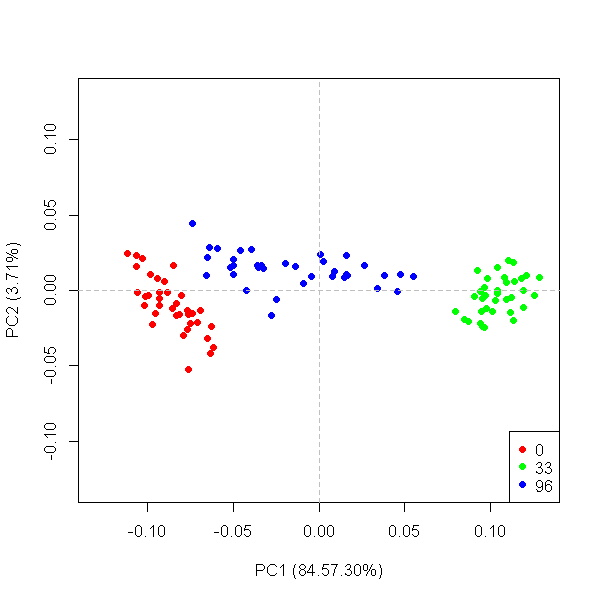

In [9]:
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res = 100)
pca <- prcomp(NIR[,-c(1:2)], center = T)
labels <- as.numeric(as.factor(NIR$Sample))

scores <- pca$x
loadings <- pca$rotation

plot(scores[,1], scores[,2], col = cols[labels], pch = 16, ylim = c(-0.13, 0.13), xlim = c(-0.13, 0.13),
     xlab = 'PC1 (84.57.30%)', ylab = 'PC2 (3.71%)')
abline(v = 0, lty = 2, col = 'grey')
abline(h = 0, lty = 2, col = 'grey')
legend('bottomright', c('0', '33', '96'), pch = 16, col = cols)

Osservazioni:
1. L'horseshoe effect sembra essere stato rimosso grazie all'impiego del pretrattamento SNV
2. La disposizione dei punti nello spazio è ovviamente cambiata, ma mostra lo stesso pattern precedentemente osservato
3. La varianza totale spiegata dalla prime due PCs è pari all'88.28% (leggermente inferiore al caso precedente; variazione non rilevante)
4. La varianza spiegata dalla PC1 è salita dal 79.30% al 84.57%
5. La varianza spiegata dalla PC2 è scesa dal 9.83% al 3.71%

# Identificazione dei minimi/massimi locali del 1° loading

In [10]:
dev1 <- savitzkyGolay(loadings[,1], p = 2, w = 9, m = 1)
dev2 <- savitzkyGolay(loadings[,1], p = 2, w = 9, m = 2)

check.dev1 <- 0
for (i in 1:(length(dev1))){
  check.dev1[i] <- dev1[i]*dev1[i+1]
}

points.dev1 <- which(check.dev1 < 0)

# Biplot degli scores e dei loadings (spettri pretrattati con SNV)

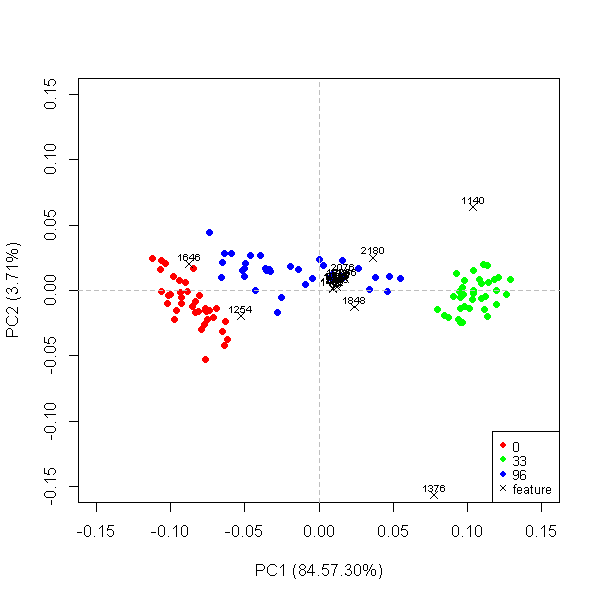

In [11]:
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res = 100)
plot(scores[,1], scores[,2], col = cols[labels], pch = 16, ylim = c(-0.15, 0.15), xlim = c(-0.15, 0.15),
     xlab = 'PC1 (84.57.30%)', ylab = 'PC2 (3.71%)')
points(loadings[points.dev1+4,1], loadings[points.dev1+4,2], pch = 4)
text(loadings[points.dev1+4,1], loadings[points.dev1+4,2]+0.006, x[points.dev1+4], pch = 4, cex = 0.6)
abline(v = 0, lty = 2, col = 'grey')
abline(h = 0, lty = 2, col = 'grey')
legend('bottomright', c('0', '33', '96', 'feature'), pch = c(16,16,16,4), col = c(cols, 1), cex = 0.8)

Osservazioni:
1. Le lunghezze d'onda selezionate sono circa le stesse osservate in precedenza (1140, 1254, 1376, 1646, 1848 e 2180 nm)
2. E' possibile escludere che sia un effetto scattering dovuto ad un differente flusso la causa delle differenze osservate

# Può essere un problema legato alla temperatura della lampada?
L'indagine di seguito riportata è stata effettuata per verificare se la disposizione nei punti varia al variare dell'ora di acquisizione. Tenendo presente che l'ordine di acquisizione è stato 33, 96 e 0 mL/min per un totale di 109 spettri, è stata creata una rampa di colori di 110 elementi.

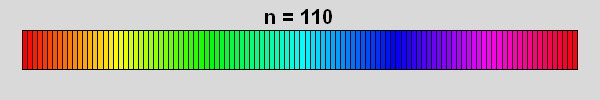

In [12]:
options(repr.plot.width=6, repr.plot.height=1, repr.plot.res = 100)
par(mai=c(0.3, 0, 0.3, 0), bg = "grey85")
r.grid <- layout(matrix(c(1), nrow = 1))
cols <- rainbow(110)
barplot(rep(2, 110), axes = FALSE, space = 0, col = cols, main = 'n = 110')

Osservazioni:
1. alla colorazione rossa (primo elemento a sinistra della rampa) corrisponderà il primo campione
2. alla colorazione viola, tendente al rosso (ultimo elemento della rampa), corrisponderà l'ultimo campione
3. alle colorazioni intermedie corrisponderanno tutti gli altri campione, disposti secondo l'ordine di acquisizione

# Score plot e tempo di acquisizione

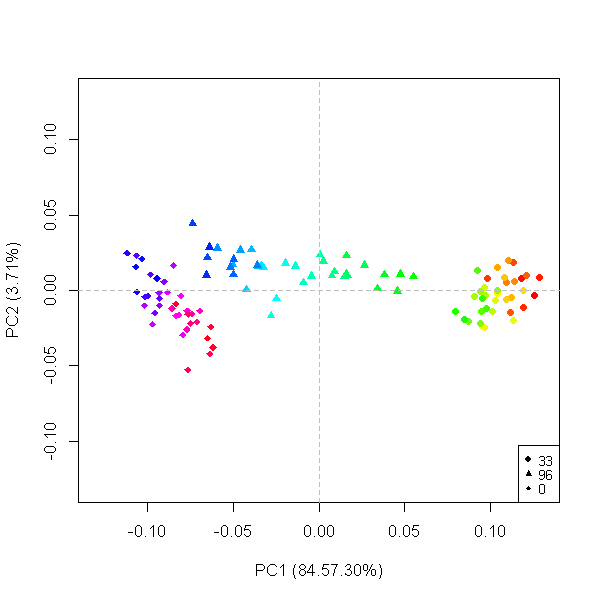

In [13]:
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res = 100)
n0 <- scores[1:37,]
n33 <- scores[38:74,]
n96 <- scores[75:109,]
nscores <- rbind(n33, n96, n0)
plot(nscores[,1], nscores[,2], col = cols, pch = c(rep(16, 36), rep(17,36), rep(18,37)),
     ylim = c(-0.13, 0.13), xlim = c(-0.13, 0.13),
     xlab = 'PC1 (84.57.30%)', ylab = 'PC2 (3.71%)')
abline(v = 0, lty = 2, col = 'grey')
abline(h = 0, lty = 2, col = 'grey')
legend('bottomright', c('33', '96', '0'), pch = c(16,17,18), cex = 0.8)

Osservazioni:
1. le acquisizioni seguono il colore della rampa
2. vi è un chiaro effetto del tempo di acquisizione e quindi, probabilmente, della temperatura della lampada
2. è forse ipotizzabile che l'effetto osservato possa essere trascurabile durante le prove in-line